# Multiple Linear Regression
# Prepare a prediction model for profit of 50_startups data.


In [4]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
Data_startups=pd.read_csv("50_Startups.csv")
Data_startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
Data_startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
Data_startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
Data_startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
Data_startups.shape

(50, 5)

In [10]:
Data_startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
len(Data_startups)

50

In [12]:
Data_startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

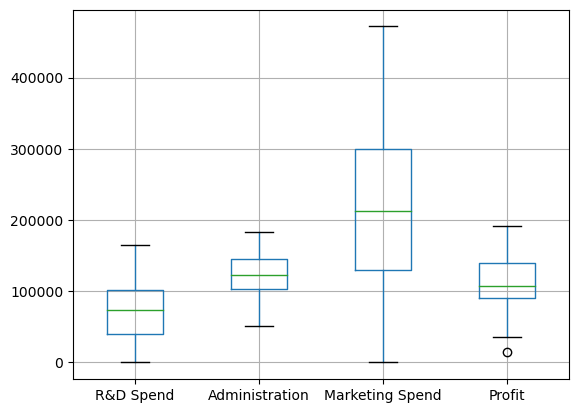

In [13]:
Data_startups.boxplot()

# Correlation Matrix

In [14]:
Data_startups.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


There are high correlation between R&Dspend and Profit, also between Marketing spend and profit

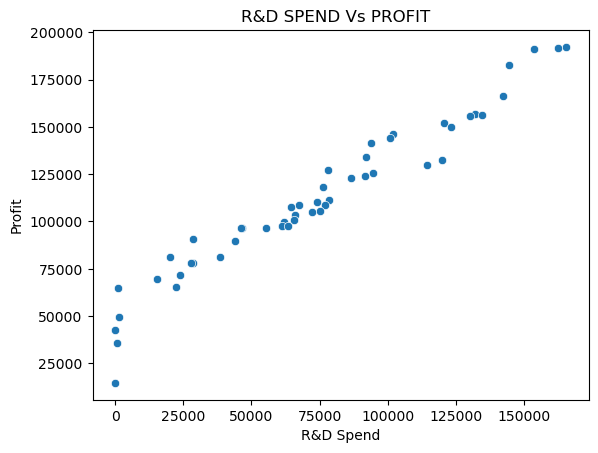

In [15]:
sns.scatterplot(x = 'R&D Spend', y = 'Profit', data = Data_startups)
plt.title( 'R&D SPEND Vs PROFIT  ')
plt.show()

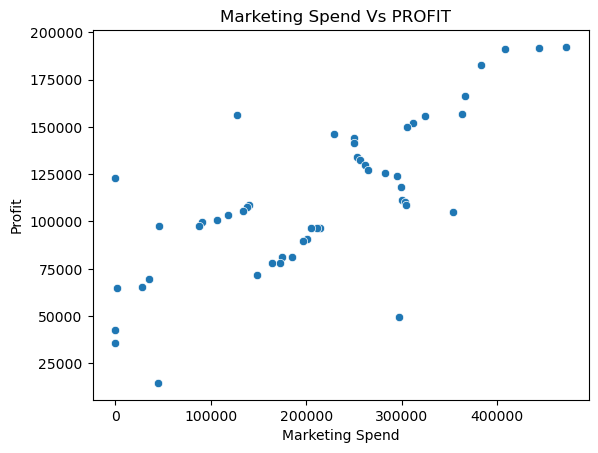

In [16]:
sns.scatterplot(x = 'Marketing Spend', y = 'Profit', data = Data_startups )
plt.title( 'Marketing Spend Vs PROFIT  ')
plt.show()

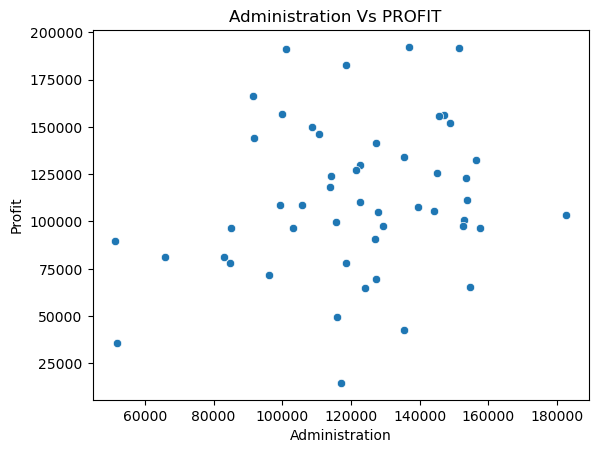

In [17]:
sns.scatterplot(x = 'Administration', y = 'Profit', data = Data_startups)
plt.title( 'Administration Vs PROFIT  ')
plt.show()

In [18]:
#change column name
Data_startups1=Data_startups.rename({'R&D Spend':'RD','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)
Data_startups1.head()

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Scatterplot between variables along with histograms

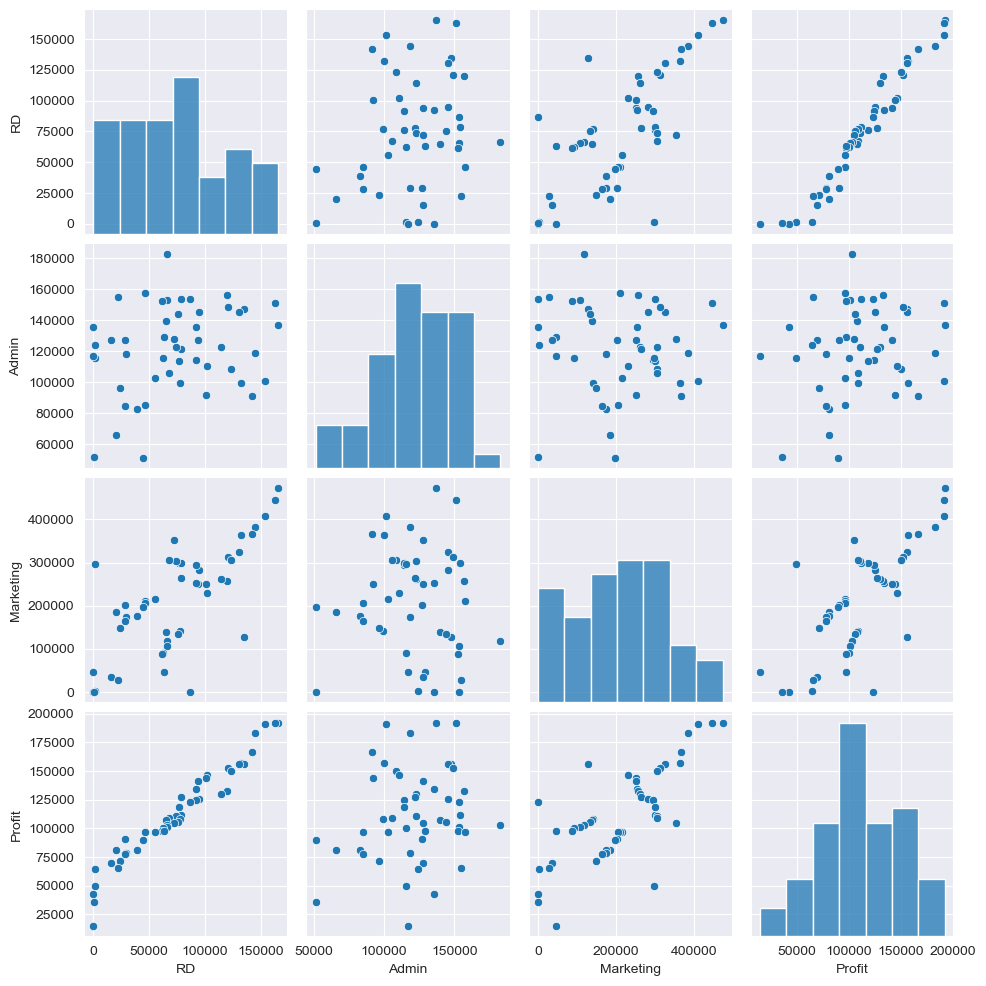

In [19]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Data_startups1)

# Preparing a model

In [20]:
#Build model
import statsmodels.formula.api as smf 
model_ols = smf.ols('Profit~RD+Admin+Marketing',data=Data_startups1).fit()

In [21]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        20:10:30   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Coefficients
model_ols.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [24]:
#t and p-Values
print(model_ols.tvalues, '\n', model_ols.pvalues)

Intercept     7.626218
RD           17.846374
Admin        -0.525507
Marketing     1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
Admin        6.017551e-01
Marketing    1.047168e-01
dtype: float64


In [25]:
#R squared values
(model_ols.rsquared,model_ols.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [26]:
model1=smf.ols('Profit~Admin',data = Data_startups1).fit()  
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues) 

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [27]:
model2=smf.ols('Profit~Marketing',data = Data_startups1).fit()  
#t and p-Values
print(model2.tvalues, '\n', model2.pvalues)

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [28]:
model3=smf.ols('Profit~Admin+Marketing',data = Data_startups1).fit()  
#t and p-Values
print(model3.tvalues, '\n', model3.pvalues)

Intercept    1.142741
Admin        2.467779
Marketing    8.281039
dtype: float64 
 Intercept    2.589341e-01
Admin        1.729198e-02
Marketing    9.727245e-11
dtype: float64


# Calculating VIF

In [29]:
rsq_RD = smf.ols('RD~Admin+Marketing',data=Data_startups1).fit().rsquared  
vif_RD = 1/(1-rsq_RD)
rsq_Admin = smf.ols('Admin~RD+Marketing',data=Data_startups1).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)
rsq_M = smf.ols('Marketing~RD+Admin',data=Data_startups1).fit().rsquared  
vif_M = 1/(1-rsq_M)
# Storing vif values in a data frame
df= {'Variables':['RD','Admin','Marketing',],'VIF':[vif_RD,vif_Admin,vif_M]}
Vif_frame = pd.DataFrame(df)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,Admin,1.175091
2,Marketing,2.326773


None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

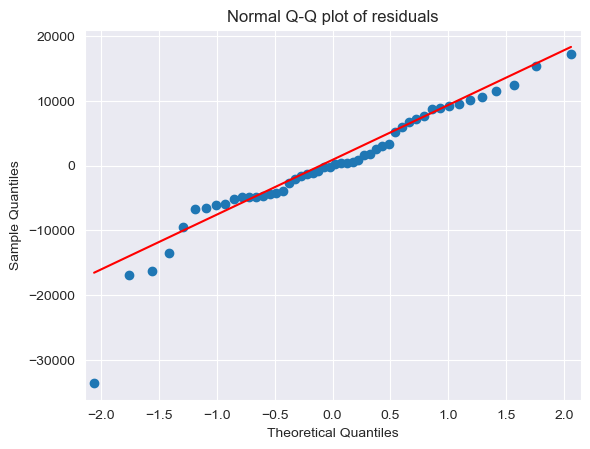

In [31]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_ols.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model_ols.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

# Residual Plot for Homoscedasticity

In [33]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

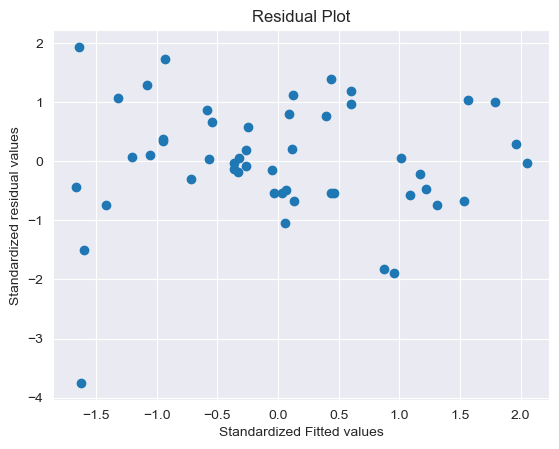

In [34]:
plt.scatter(get_standardized_values(model_ols.fittedvalues),
            get_standardized_values(model_ols.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


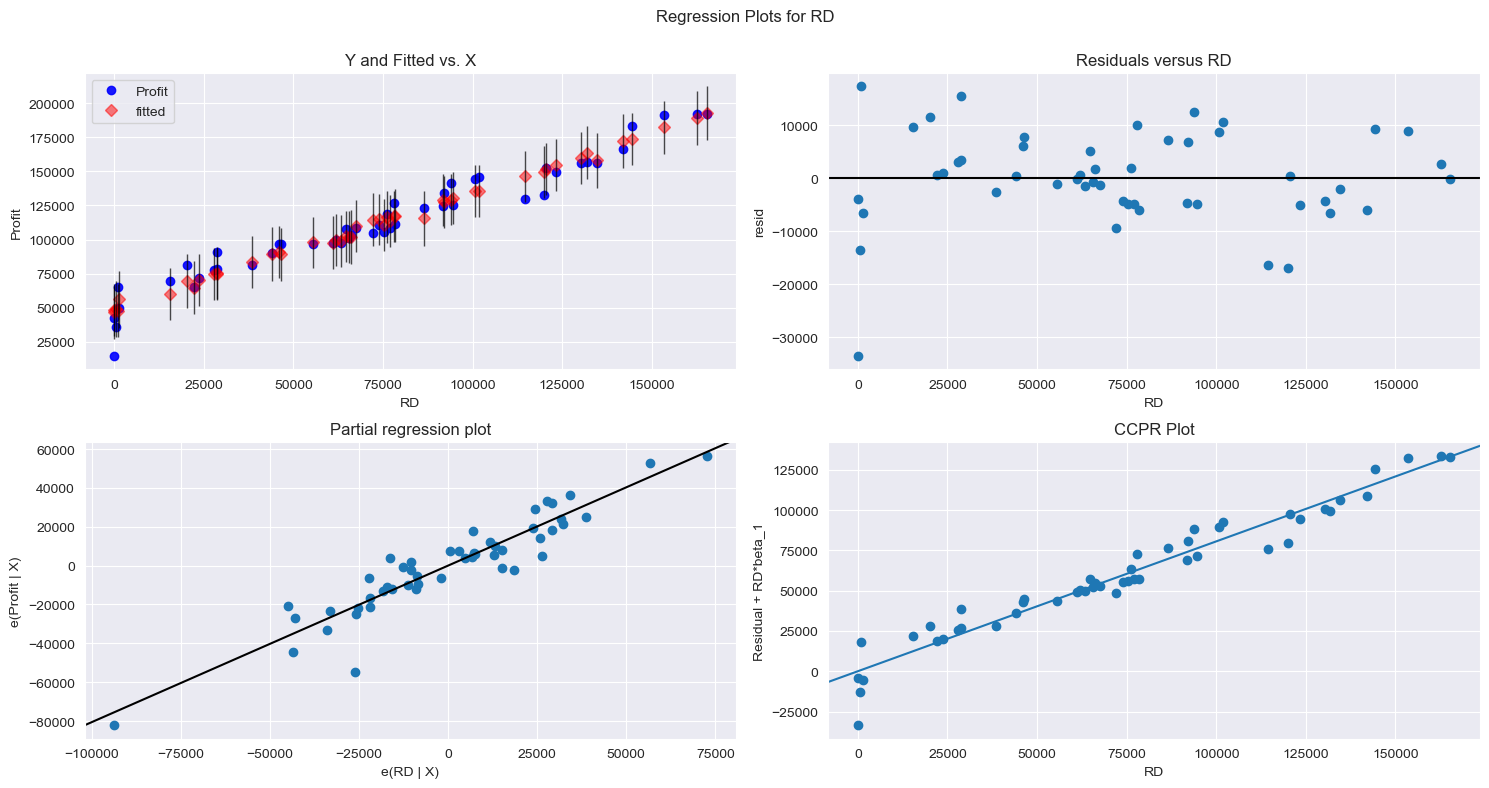

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "RD", fig=fig)
plt.show()

eval_env: 1


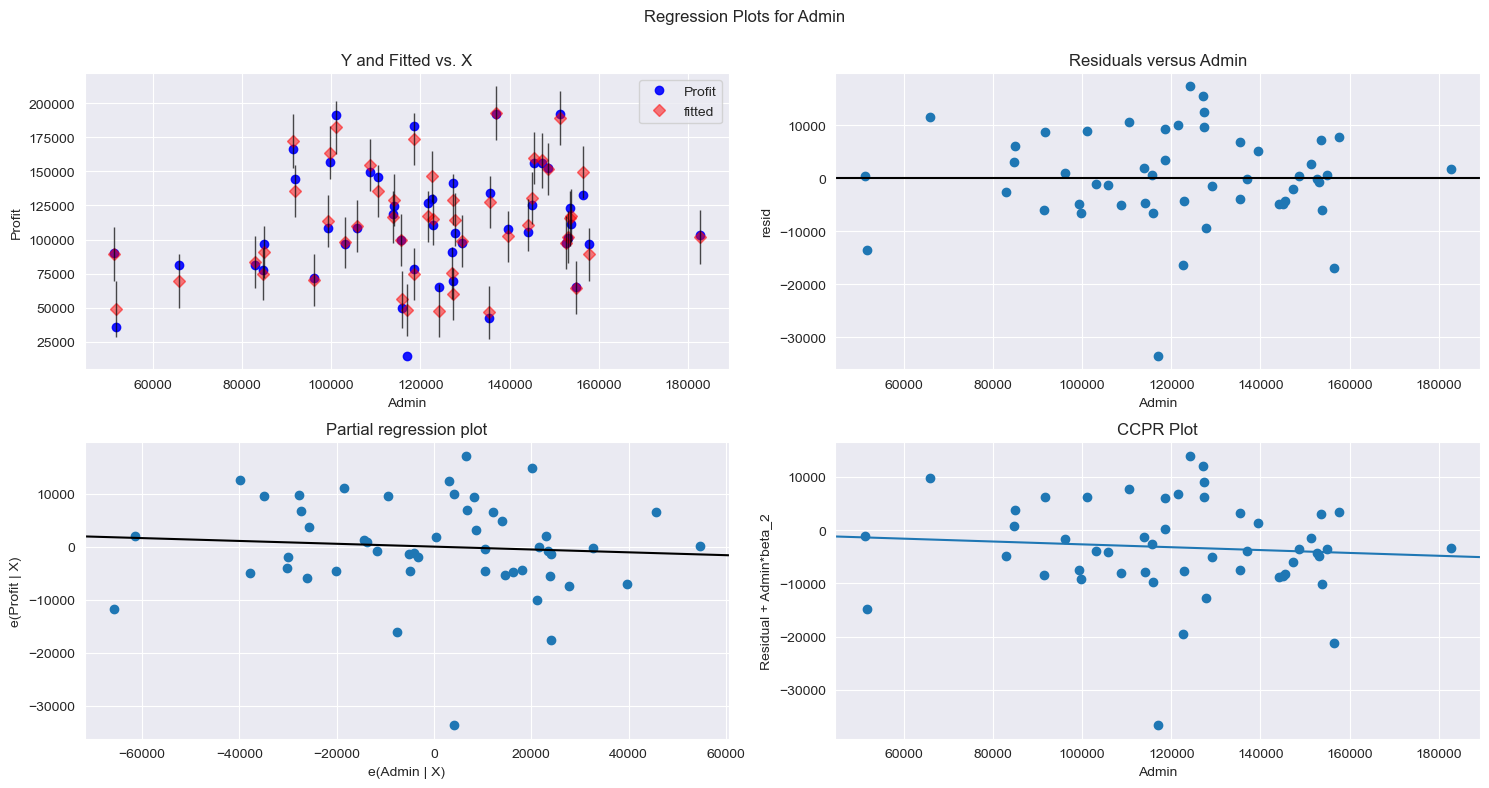

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols, "Admin", fig=fig)
plt.show()

eval_env: 1


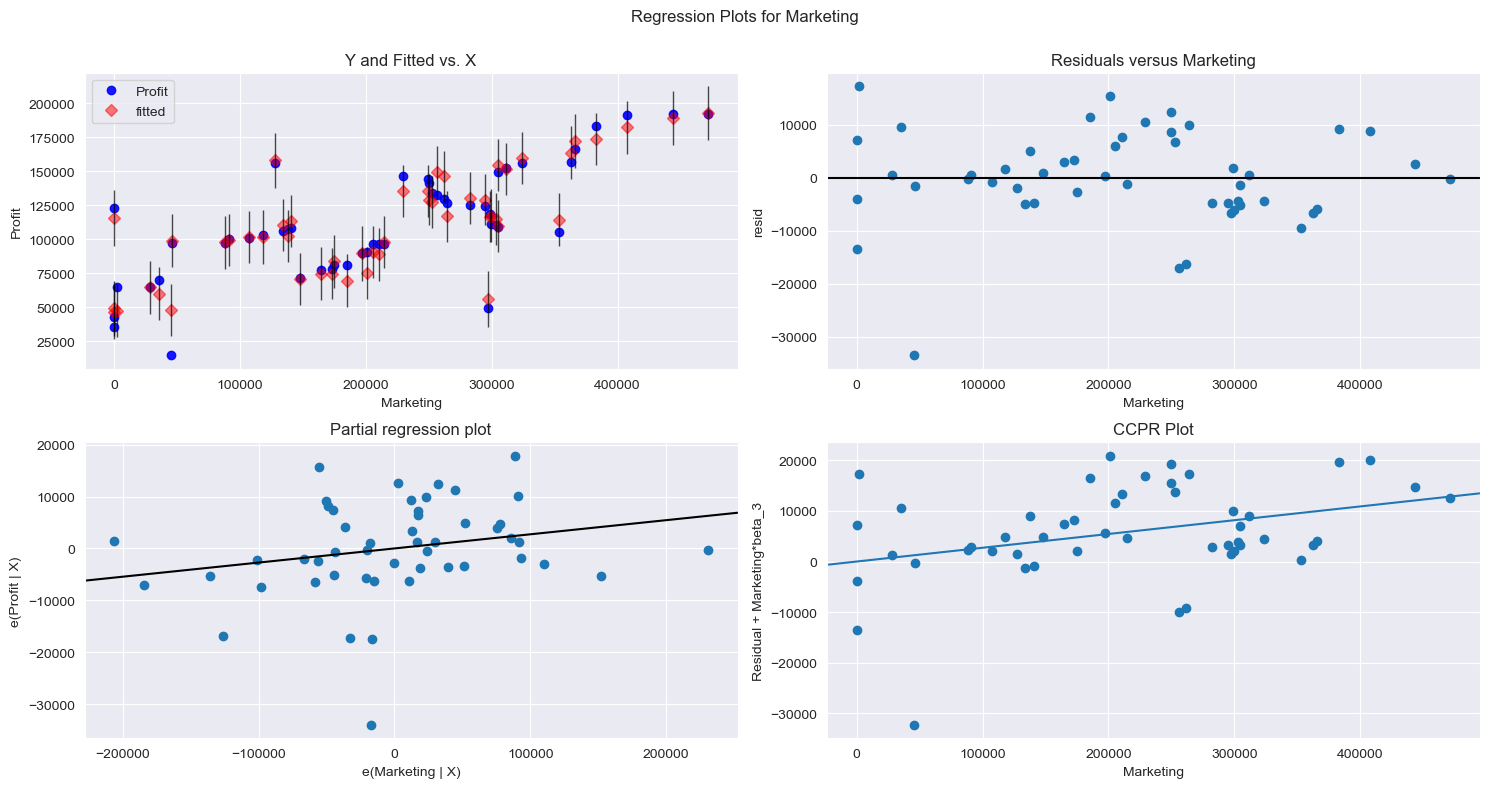

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_ols,"Marketing", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [38]:
model_influence = model_ols.get_influence()
(c,_) = model_influence.cooks_distance
(c)

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

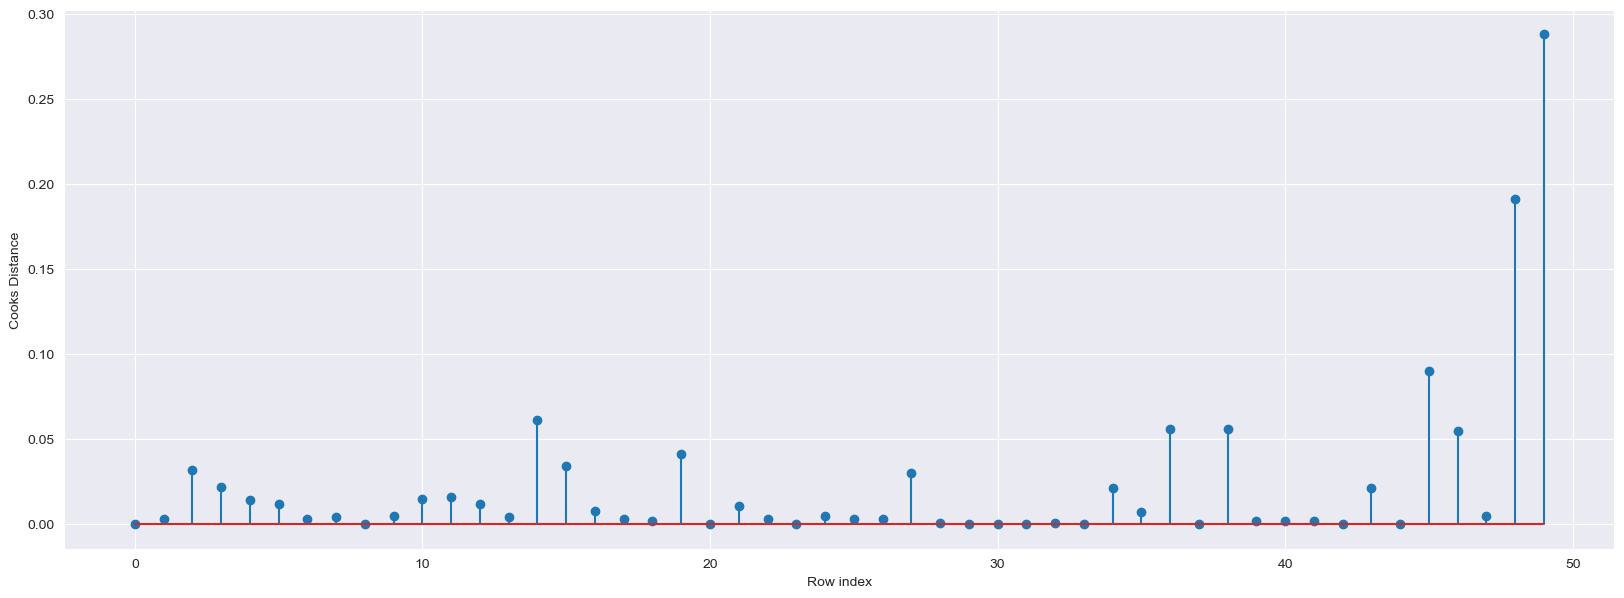

In [39]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Data_startups1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432584)

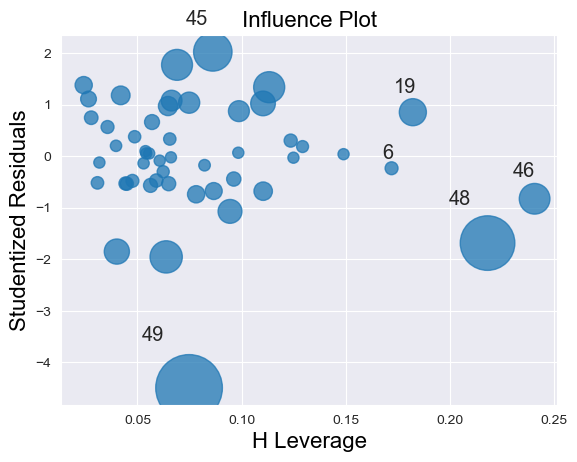

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_ols)
plt.show()

# Leverage Cuttoff Value = 3*(k+1)/n 
# k = no.of features/columns & n = no. of datapoints

In [42]:
k=Data_startups1.shape[1]
n=Data_startups1.shape[0]
leverage_cutoff = (3*(k+1))/n
print('leverage_cutoff::',leverage_cutoff)

leverage_cutoff:: 0.36


In [43]:
Data_startups1[Data_startups1.index.isin([49,48,46])]

,RD,Admin,Marketing,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Improving model

In [111]:
Data_startups2=Data_startups1.drop(Data_startups1.index[[49,48,46]],axis=0)  
Data_startups2.shape

(47, 5)

In [112]:
Data_startups2.head()

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Build model 

In [113]:
model_1=smf.ols("Profit~RD+Admin+Marketing",data=Data_startups2).fit()

In [114]:
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.12e-30
Time:                        20:39:41   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
RD             0.7642      0.041     18.704      0.000       0.682       0.847
Admin         -0.0532      0.044     -1.202      0.236      -0.142       0.036
Marketing      0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
pred =model_1.predict(Data_startups2)
pred_1 =pd.Series(pred)                    


In [116]:
pred_1

0     189144.021141
1     185571.505316
2     180343.992254
3     171860.489927
4     171153.336127
5     162804.123770
6     156477.343357
7     158187.870039
8     150255.251593
9     154352.656745
10    135977.904080
11    136546.022058
12    129455.572750
13    127661.509729
14    147998.542616
15    145793.706944
16    118010.693099
17    129938.578129
18    129669.713023
19    116105.658621
20    117938.402714
21    117474.656407
22    115854.360943
23    111858.337361
24    115352.079636
25    103683.989930
26    111491.723852
27    115392.974943
28    101954.513645
29    102912.662101
30    101740.441122
31     99040.236547
32    100968.977775
33    100540.396562
34     90608.105042
35     94025.014882
36     78421.052027
37     94122.405580
38     74828.161109
39     87671.677996
40     78232.195211
41     79164.837264
42     74891.654066
43     64193.943484
44     67653.399768
45     52436.773768
47     51024.934949
dtype: float64

In [117]:
## Rsqaure value
d2={'Prep_Models':['model_ols','model_1'],'Rsquared':[model_ols.rsquared,model_1.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,model_ols,0.950746
1,model_1,0.961413


In [120]:
Data_startups3=Data_startups2.drop(Data_startups2.index[[46]],axis=0)  
Data_startups3.shape

(46, 5)

In [123]:
model_2= smf.ols('Profit~RD+Admin+Marketing',data = Data_startups3 ).fit()

In [124]:
(model_2.rsquared,model_2.aic)

(0.9588317650814476, 952.0509407540137)

In [125]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     326.1
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.15e-29
Time:                        20:42:40   Log-Likelihood:                -472.03
No. Observations:                  46   AIC:                             952.1
Df Residuals:                      42   BIC:                             959.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.866e+04   5879.333      9.977      0.000    4.68e+04    7.05e+04
RD             0.7576      0.041     18.500      0.000       0.675       0.840
Admin         -0.0487      0.044     -1.103      0.276      -0.138       0.040
Marketing      0.0238      0.015      1.618      0.113      -0.006       0.054
==============================================================================
Omnibus:                        0.291   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.476
Skew:                           0.026   Prob(JB):                        0.788
Kurtosis:                       2.504   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
pred2=model_2.predict(Data_startups3)
pred_2 =pd.Series(pred2)                    
pred_2

0     188520.346351
1     185066.250189
2     179716.058313
3     171402.426423
4     170607.725134
5     162368.106979
6     156530.608926
7     158017.931024
8     150179.203956
9     154085.021668
10    135954.210358
11    136419.664623
12    129534.915210
13    127786.697663
14    148030.468605
15    145700.961093
16    118150.331557
17    130052.453621
18    129647.309026
19    116663.517840
20    118011.884447
21    117713.614776
22    115977.321789
23    111944.817652
24    115550.938133
25    104150.059987
26    111913.272620
27    115489.344539
28    102631.413445
29    103471.980359
30    102173.969235
31     99650.999358
32    101510.782308
33    100806.007253
34     91185.768451
35     94282.711778
36     78988.749192
37     94250.427121
38     75194.126862
39     88007.032086
40     78795.974130
41     79591.293245
42     75418.597900
43     65055.700438
44     68604.508317
45     53421.166019
dtype: float64

In [128]:
## Rsqaure value
d3={'Prep_Models':['model_ols','model_1','model_2'],'Rsquared':[model_ols.rsquared,model_1.rsquared,model_2.rsquared]}
table1=pd.DataFrame(d3)
table1

,Prep_Models,Rsquared
0,model_ols,0.950746
1,model_1,0.961413
2,model_2,0.958832


In [129]:
pred_final =model_1.predict(Data_startups2)

In [130]:
pred_final =pd.Series(pred_final)

In [131]:
pred_final

0     189144.021141
1     185571.505316
2     180343.992254
3     171860.489927
4     171153.336127
5     162804.123770
6     156477.343357
7     158187.870039
8     150255.251593
9     154352.656745
10    135977.904080
11    136546.022058
12    129455.572750
13    127661.509729
14    147998.542616
15    145793.706944
16    118010.693099
17    129938.578129
18    129669.713023
19    116105.658621
20    117938.402714
21    117474.656407
22    115854.360943
23    111858.337361
24    115352.079636
25    103683.989930
26    111491.723852
27    115392.974943
28    101954.513645
29    102912.662101
30    101740.441122
31     99040.236547
32    100968.977775
33    100540.396562
34     90608.105042
35     94025.014882
36     78421.052027
37     94122.405580
38     74828.161109
39     87671.677996
40     78232.195211
41     79164.837264
42     74891.654066
43     64193.943484
44     67653.399768
45     52436.773768
47     51024.934949
dtype: float64

In [132]:
Data_startups2.head(3)

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [136]:
new_data = (pd.DataFrame({
    "RD": [16000.51, 173654.13, 17551.31],
    "Admin": [134424.42, 176527.42, 132241.42],
    "Marketing": [425213.22, 416562.35,552444.53]
}))
new_data

,RD,Admin,Marketing
0,16000.51,134424.42,425213.22
1,173654.13,176527.42,416562.35
2,17551.31,132241.42,552444.53


In [137]:
pred_final1 =model_1.predict(new_data)

In [138]:
pred_final1

0     73973.435823
1    191997.366924
2     78466.573426
dtype: float64